# Emotion Recognition

DESCRIPTION

Future customizations, such as understanding human emotions, could lead to a range of advancements, such as determining whether a person likes a specific statement, item or product, food, or how they are feeling in a particular circumstance, and so on. 

 

Objective:

To build a model using a convolutional neural network that can classify a person's emotion

Dataset description:

The dataset contains two folders named Train and Test. These folders have approximately 35,000 images of seven different human emotions, such as anger, disgust, fear, happiness, neutral, sadness, and surprise.

 

Train folder: This folder has images for training the model, which is divided into subfolders having the same name as the class. 

Test folder: This folder has images for testing the model, which is divided into subfolders having the same name as the class.

In [126]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import *

import os
from glob import glob

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten,Activation
from tensorflow.keras.activations import relu, softmax, tanh
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping

In [127]:
training_path = 'C:/Users/SAURSHIN/Downloads/archive/images/train/'
testing_path = 'C:/Users/SAURSHIN/Downloads/archive/images/validation/'

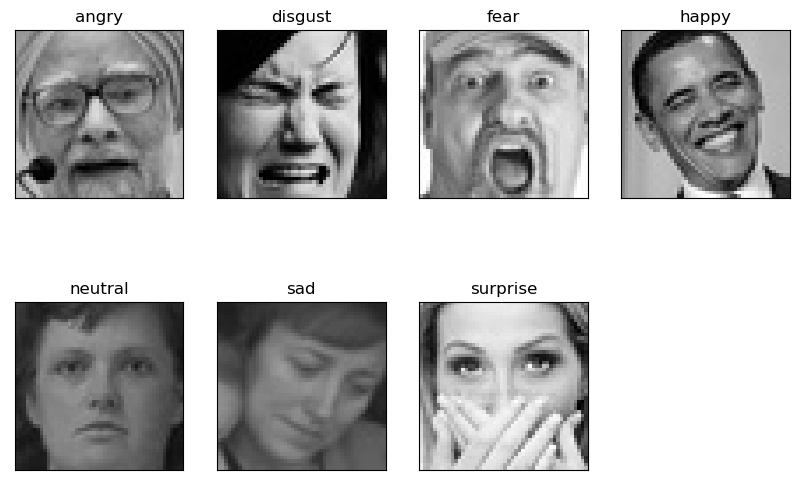

In [128]:
plt.figure(figsize=(10, 10))
expression = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for i in range(len(expression)):
    plt.subplot(3,4,i+1)
    img = load_img(training_path + '/'+ expression[i] + '/'+ os.listdir(training_path + '/'+ expression[i])[1], target_size=(48,48))
    plt.imshow(img)
    plt.title(expression[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [129]:
train_dict = {'label': list(i for i in os.listdir(training_path)), 
              'counts' : list(len(os.listdir(training_path+i)) for i in os.listdir(training_path))}
train_count = pd.DataFrame(train_dict)
train_count

,label,counts
0,angry,3993
1,disgust,436
2,fear,4103
3,happy,7164
4,neutral,4982
5,sad,4938
6,surprise,3205


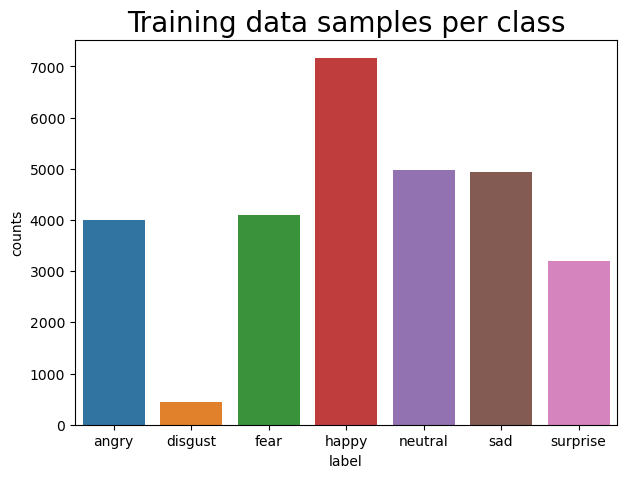

In [130]:
plt.figure(figsize=(7,5))
sns.barplot(train_count['label'], train_count['counts'])
plt.title('Training data samples per class', size=20)
plt.show()

In [131]:
test_dict = {'label': list(i for i in os.listdir(testing_path)), 
              'counts' : list(len(os.listdir(testing_path+i)) for i in os.listdir(testing_path))}
test_count = pd.DataFrame(test_dict)
test_count

,label,counts
0,angry,960
1,disgust,111
2,fear,1018
3,happy,1825
4,neutral,1216
5,sad,1139
6,surprise,797


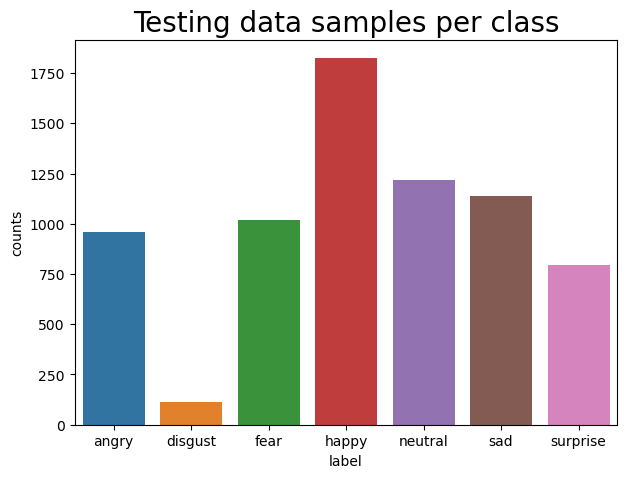

In [132]:
plt.figure(figsize=(7,5))
sns.barplot(test_count['label'], test_count['counts'])
plt.title('Testing data samples per class', size=20)
plt.show()

In [133]:
generator = ImageDataGenerator(rescale= 1.0/255.0)

In [134]:
training_data = generator.flow_from_directory(training_path,
                                              target_size=(48, 48), 
                                              batch_size=128, 
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              shuffle=True)

Found 28821 images belonging to 7 classes.


In [135]:
testing_data = generator.flow_from_directory(testing_path, 
                                             target_size=(48,48),
                                             color_mode='grayscale', 
                                             batch_size=128, 
                                             class_mode='categorical', 
                                             shuffle=False)

Found 7066 images belonging to 7 classes.


In [11]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(48,48,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'] )
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [24]:
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping( monitor='val_loss',
                    min_delta=0,
                    patience=3,
                    verbose=1,
                    mode='auto',
                    baseline=None,
                    restore_best_weights=True,)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

In [25]:
history = model.fit(training_data, 
                    epochs=50, 
                    batch_size=128,
                    steps_per_epoch=training_data.n//training_data.batch_size,
                    validation_data=testing_data, 
                    validation_steps=testing_data.n//testing_data.batch_size,
                    callbacks=[reduce_learningrate, es, checkpoint])

Epoch 1/50
225/225 [==============================] - 870s 4s/step - loss: 2.2921 - accuracy: 0.2352 - val_loss: 1.9289 - val_accuracy: 0.2310 - lr: 1.0000e-04
Epoch 2/50
225/225 [==============================] - 636s 3s/step - loss: 1.9175 - accuracy: 0.3202 - val_loss: 2.2543 - val_accuracy: 0.2607 - lr: 1.0000e-04
Epoch 3/50
225/225 [==============================] - 630s 3s/step - loss: 1.7676 - accuracy: 0.3686 - val_loss: 1.6460 - val_accuracy: 0.3703 - lr: 1.0000e-04
Epoch 4/50
225/225 [==============================] - 617s 3s/step - loss: 1.6682 - accuracy: 0.3983 - val_loss: 1.5931 - val_accuracy: 0.4214 - lr: 1.0000e-04
Epoch 5/50
225/225 [==============================] - 617s 3s/step - loss: 1.5895 - accuracy: 0.4263 - val_loss: 1.4480 - val_accuracy: 0.4634 - lr: 1.0000e-04
Epoch 6/50
225/225 [==============================] - 621s 3s/step - loss: 1.5137 - accuracy: 0.4454 - val_loss: 1.4369 - val_accuracy: 0.4712 - lr: 1.0000e-04
Epoch 7/50
225/225 [====================

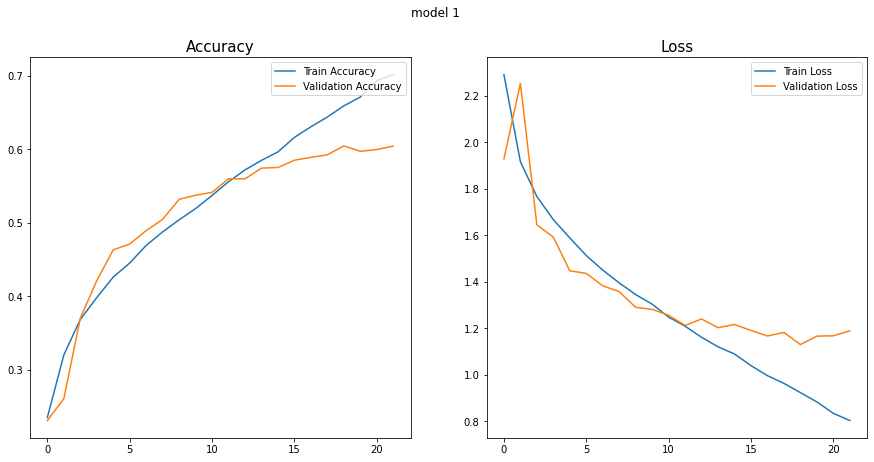

In [27]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy', size=15)
plt.legend(loc = 'upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss', size=15)
plt.legend(loc = 'upper right')
plt.suptitle('model 1')
plt.show()

In [26]:
model.evaluate(testing_data)

56/56 [==============================] - 31s 550ms/step - loss: 1.1284 - accuracy: 0.6057


[1.1284024715423584, 0.6057175397872925]

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
preds = model.predict(testing_data)

56/56 [==============================] - 14s 242ms/step


In [138]:
testing_data.labels.shape

(7066,)

In [139]:
final_preds = [np.argmax(i) for i in preds]

In [140]:
labels = testing_data.class_indices.keys()

In [149]:
labels

dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

In [141]:
print(classification_report(testing_data.labels, final_preds, target_names=labels))

              precision    recall  f1-score   support

       angry       0.48      0.55      0.51       960
     disgust       0.78      0.47      0.58       111
        fear       0.48      0.35      0.40      1018
       happy       0.82      0.80      0.81      1825
     neutral       0.55      0.58      0.57      1216
         sad       0.47      0.50      0.48      1139
    surprise       0.68      0.77      0.72       797

    accuracy                           0.61      7066
   macro avg       0.61      0.57      0.58      7066
weighted avg       0.61      0.61      0.60      7066



In [148]:
print(confusion_matrix(testing_data.labels, final_preds))

[[ 529    4   89   57  107  135   39]
 [  22   52   10    5    7   12    3]
 [ 167    3  354   49  117  196  132]
 [  76    2   43 1456  111   87   50]
 [ 123    0   63   98  711  188   33]
 [ 156    5  121   69  195  565   28]
 [  23    1   56   49   39   16  613]]


<AxesSubplot:>

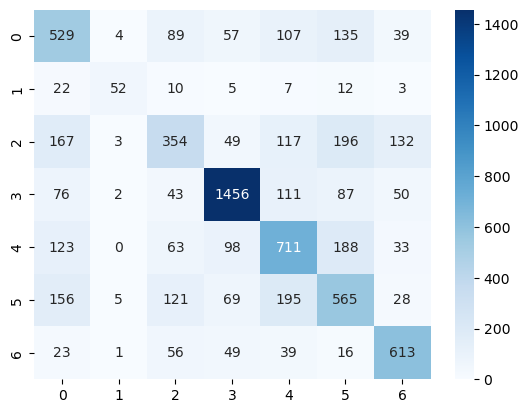

In [147]:
sns.heatmap(confusion_matrix(testing_data.labels, final_preds),annot=True, cmap='Blues', fmt='')

In [104]:
# model.save('model_1.h5')

# Model 2

In [257]:
model2 = Sequential()
model2.add(Conv2D(128,(3,3),input_shape=(45,45,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.20))
model2.add(BatchNormalization())

model2.add(Conv2D(256,(5,5)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.20))
model2.add(BatchNormalization())

model2.add(Flatten())

In [258]:
model2.add(Dense(128, activation='elu'))
model2.add(BatchNormalization())

model2.add(Dense(512, activation='elu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.20))

model2.add(Dense(7, activation='softmax'))

In [259]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 43, 43, 128)       1280      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 21, 21, 128)      0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 21, 21, 128)       0         
                                                                 
 batch_normalization_42 (Bat  (None, 21, 21, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 17, 17, 256)       819456    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 256)       

In [260]:
model2.compile(optimizer='rmsprop', loss=categorical_crossentropy, metrics=['accuracy'] )

In [261]:
es = EarlyStopping(patience=2)

In [262]:
model2.fit(training_data, validation_data=testing_data, epochs=10, callbacks=es)

Epoch 1/10
89/89 [==============================] - 198s 2s/step - loss: 2.0865 - accuracy: 0.2653 - val_loss: 2.4712 - val_accuracy: 0.2635
Epoch 2/10
89/89 [==============================] - 203s 2s/step - loss: 1.7231 - accuracy: 0.3514 - val_loss: 1.8660 - val_accuracy: 0.3657
Epoch 3/10
89/89 [==============================] - 205s 2s/step - loss: 1.5297 - accuracy: 0.4262 - val_loss: 1.7866 - val_accuracy: 0.3939
Epoch 4/10
89/89 [==============================] - 206s 2s/step - loss: 1.3587 - accuracy: 0.4899 - val_loss: 1.6124 - val_accuracy: 0.4457
Epoch 5/10
89/89 [==============================] - 205s 2s/step - loss: 1.1619 - accuracy: 0.5688 - val_loss: 1.6423 - val_accuracy: 0.4477
Epoch 6/10
89/89 [==============================] - 206s 2s/step - loss: 0.9475 - accuracy: 0.6520 - val_loss: 1.7360 - val_accuracy: 0.4491


In [124]:
model2 = tf.keras.models.load_model('model2.h5')

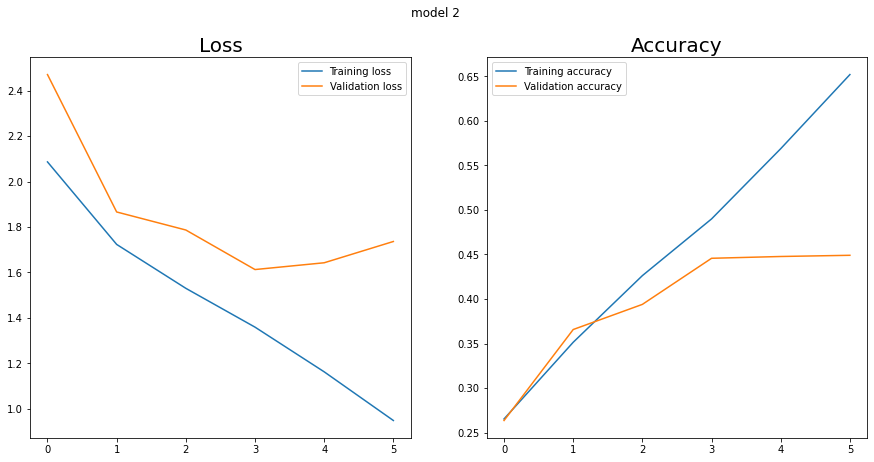

In [283]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(model2.history.history['loss'], label='Training loss')
plt.plot(model2.history.history['val_loss'], label='Validation loss')
plt.title('Loss', size=20)
plt.legend()

plt.subplot(1,2,2)
plt.plot(model2.history.history['accuracy'], label='Training accuracy')
plt.plot(model2.history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy', size=20)
plt.legend()

plt.suptitle('model 2')

plt.show()

In [125]:
model2.evaluate(testing_data)

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "C:\Users\SAURSHIN\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\SAURSHIN\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\SAURSHIN\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\SAURSHIN\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\SAURSHIN\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\SAURSHIN\AppData\Local\Temp\ipykernel_6712\3798522619.py", line 1, in <module>
      model2.evaluate(testing_data)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\engine\training.py", line 2040, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\engine\training.py", line 1820, in test_function
      return step_function(self, iterator)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\engine\training.py", line 1804, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\engine\training.py", line 1792, in run_step
      outputs = model.test_step(data)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\engine\training.py", line 1758, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\SAURSHIN\Anaconda3\lib\site-packages\keras\backend.py", line 5538, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[162,7] labels_size=[128,7]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_12960]

In [119]:
preds2 = model2.predict(testing_data)
final_preds2 = [np.argmax(i) for i in preds2]

56/56 [==============================] - 13s 236ms/step


In [122]:
print(classification_report(testing_data.labels, final_preds2, target_names=labels))

              precision    recall  f1-score   support

       angry       0.48      0.55      0.51       960
     disgust       0.78      0.47      0.58       111
        fear       0.48      0.35      0.40      1018
       happy       0.82      0.80      0.81      1825
     neutral       0.55      0.58      0.57      1216
         sad       0.47      0.50      0.48      1139
    surprise       0.68      0.77      0.72       797

    accuracy                           0.61      7066
   macro avg       0.61      0.57      0.58      7066
weighted avg       0.61      0.61      0.60      7066



In [289]:
confusion_matrix(testing_data.labels, final_preds2)

array([[ 78,   9,  72, 128,  64, 114,  31],
       [ 12,   3,  20,  28,  10,  33,   5],
       [ 73,  16,  83,  99,  60, 122,  31],
       [108,  15, 108, 145,  59, 157,  46],
       [ 82,   5,  83, 120,  47, 113,  22],
       [ 61,  11,  67, 100,  34,  87,  39],
       [ 72,  12,  58,  82,  42,  84,  25]], dtype=int64)

# Transfer Learning

## 1 : Densenet

In [2]:
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions

In [3]:
generator2 = ImageDataGenerator(preprocessing_function=preprocess_input) 

In [12]:
train_data2 = generator2.flow_from_directory("F:/Arificial Intelligence Course/Advance deep learning/Dataset_Emotion_Recognition/data/train" , 
                                             target_size=[48,48], 
                                             class_mode='categorical', 
                                             batch_size=128)

Found 28820 images belonging to 7 classes.


In [13]:
test_data2 = generator2.flow_from_directory("F:/Arificial Intelligence Course/Advance deep learning/Dataset_Emotion_Recognition/data/test", 
                                            target_size=[48,48], 
                                            class_mode='categorical', 
                                            batch_size=128)

Found 7066 images belonging to 7 classes.


In [14]:
train_data2.image_shape

(48, 48, 3)

In [15]:
test_data2.image_shape

(48, 48, 3)

In [16]:
model3 = DenseNet121(include_top=False, input_shape=[45,45,3], weights='imagenet')

In [17]:
for layers in model3.layers:
    layers.trainable=False

In [18]:
model3 = Sequential(model3)

In [19]:
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.25))

model3.add(Dense(7, activation='softmax'))

In [20]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 7,301,703
Trainable params: 264,199
Non-trainable params: 7,037,504
_________________________________________________________________


In [21]:
model3.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [22]:
es = EarlyStopping(patience=2)

In [23]:
model3.fit(train_data2, validation_data=test_data2, callbacks=es, epochs=15)

Epoch 1/15
226/226 [==============================] - 969s 4s/step - loss: 1.6419 - accuracy: 0.3646 - val_loss: 1.5008 - val_accuracy: 0.4196
Epoch 2/15
226/226 [==============================] - 445s 2s/step - loss: 1.4996 - accuracy: 0.4217 - val_loss: 1.4813 - val_accuracy: 0.4277
Epoch 3/15
226/226 [==============================] - 260s 1s/step - loss: 1.4501 - accuracy: 0.4476 - val_loss: 1.4440 - val_accuracy: 0.4474
Epoch 4/15
226/226 [==============================] - 212s 939ms/step - loss: 1.4158 - accuracy: 0.4595 - val_loss: 1.4499 - val_accuracy: 0.4513
Epoch 5/15
226/226 [==============================] - 182s 806ms/step - loss: 1.3857 - accuracy: 0.4722 - val_loss: 1.4261 - val_accuracy: 0.4571
Epoch 6/15
226/226 [==============================] - 183s 808ms/step - loss: 1.3619 - accuracy: 0.4813 - val_loss: 1.4339 - val_accuracy: 0.4568
Epoch 7/15
226/226 [==============================] - 178s 787ms/step - loss: 1.3382 - accuracy: 0.4935 - val_loss: 1.4108 - val_accu

In [24]:
model3.save('model3_pretrained.h5')

INFO:tensorflow:Assets written to: model3_pretrained\assets


INFO:tensorflow:Assets written to: model3_pretrained\assets


In [36]:
model3.evaluate(test_data2)

24/24 [==============================] - 21s 846ms/step - loss: 1.5966 - accuracy: 0.3919


[1.5965577363967896, 0.39193278551101685]

## 2 :  resnet

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [28]:
res = ResNet50(include_top=False, input_shape=[45,45,3], weights='imagenet')

In [29]:
for layers in res.layers:
    layers.trainable = False

In [31]:
res = Sequential(res)
res.add(Flatten())

res.add(Dense(128, activation='relu'))
res.add(Dropout(0.20))
res.add(Dense(7, activation='softmax'))

In [32]:
res.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                                 
Total params: 24,637,319
Trainable params: 1,049,607
Non-trainable params: 23,587,712
_________________________________________________________________


In [34]:
res.compile(optimizer='rmsprop', loss=categorical_crossentropy, metrics=['accuracy'])

In [35]:
res.fit(train_data2, validation_data=test_data2, epochs=15, callbacks=es)

Epoch 1/15
89/89 [==============================] - 84s 902ms/step - loss: 1.9255 - accuracy: 0.2346 - val_loss: 1.8064 - val_accuracy: 0.2491
Epoch 2/15
89/89 [==============================] - 81s 915ms/step - loss: 1.7297 - accuracy: 0.2907 - val_loss: 1.8099 - val_accuracy: 0.2655
Epoch 3/15
89/89 [==============================] - 78s 882ms/step - loss: 1.6641 - accuracy: 0.3253 - val_loss: 1.7593 - val_accuracy: 0.2918
Epoch 4/15
89/89 [==============================] - 80s 897ms/step - loss: 1.6156 - accuracy: 0.3527 - val_loss: 1.7408 - val_accuracy: 0.3210
Epoch 5/15
89/89 [==============================] - 81s 914ms/step - loss: 1.5635 - accuracy: 0.3820 - val_loss: 1.8103 - val_accuracy: 0.2958
Epoch 6/15
89/89 [==============================] - 82s 918ms/step - loss: 1.5200 - accuracy: 0.3954 - val_loss: 1.7493 - val_accuracy: 0.3247


In [45]:
res.evaluate(test_data2)

24/24 [==============================] - 24s 985ms/step - loss: 1.7493 - accuracy: 0.3247


[1.7493284940719604, 0.3247058689594269]

# Testing model with new user input

In [83]:
model = tf.keras.models.load_model('model.h5')

In [84]:
model.evaluate(testing_data)

56/56 [==============================] - 15s 252ms/step - loss: 1.1284 - accuracy: 0.6057


[1.1284024715423584, 0.6057175397872925]

In [104]:
from tensorflow.keras.preprocessing import image

In [105]:
img_path = path = "./testing images/happy.jpg"

In [106]:
img = image.load_img(img_path, target_size=[48,48], grayscale=True)

In [107]:
img_arr = image.img_to_array(img)

In [108]:
img_arr.shape

(48, 48, 1)

In [109]:
preds = model.predict(np.expand_dims(img_arr, axis=0))

1/1 [==============================] - 0s 49ms/step


In [110]:
labels = list(training_data.class_indices.keys())

In [111]:
labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

[[0. 0. 0. 1. 0. 0. 0.]]


'happy'

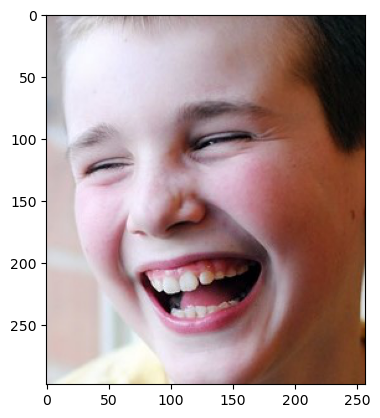

In [112]:
plt.imshow(image.load_img(img_path))
print(preds)
labels[np.argmax(preds)]

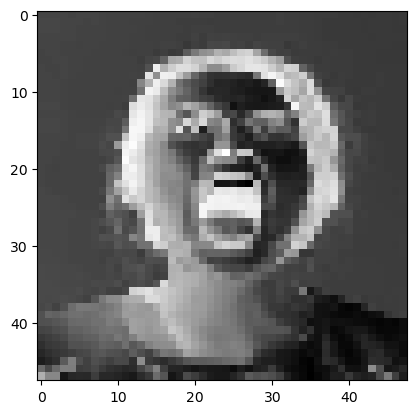

In [94]:
plt.imshow(img, cmap='binary')